<a href="https://colab.research.google.com/github/AkkapakaManikanta/Ant_bee/blob/main/transfer_learning_ants_bees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.nn import Linear
import torch.nn as nn
from torchvision import datasets, transforms, models
import torch.nn.functional as F
import requests
from PIL import Image
import PIL                             

In [ ]:
!git clone https://github.com/jaddoescad/ants_and_bees.git

fatal: destination path 'ants_and_bees' already exists and is not an empty directory.


In [ ]:
!ls

ants_and_bees  sample_data


In [ ]:
!ls ants_and_bees

train  val


In [ ]:
!ls ants_and_bees/train

ants  bees


In [ ]:
!ls ants_and_bees/train/ants

 0013035.jpg		     408393566_b5b694119b.jpg
 1030023514_aad5c608f9.jpg   424119020_6d57481dab.jpg
 1095476100_3906d8afde.jpg   424873399_47658a91fb.jpg
 1099452230_d1949d3250.jpg   450057712_771b3bfc91.jpg
 116570827_e9c126745d.jpg    45472593_bfd624f8dc.jpg
 1225872729_6f0856588f.jpg   459694881_ac657d3187.jpg
 1262877379_64fcada201.jpg   460372577_f2f6a8c9fc.jpg
 1269756697_0bce92cdab.jpg   460874319_0a45ab4d05.jpg
 1286984635_5119e80de1.jpg   466430434_4000737de9.jpg
 132478121_2a430adea2.jpg    470127037_513711fd21.jpg
 1360291657_dc248c5eea.jpg   474806473_ca6caab245.jpg
 1368913450_e146e2fb6d.jpg   475961153_b8c13fd405.jpg
 1473187633_63ccaacea6.jpg   484293231_e53cfc0c89.jpg
 148715752_302c84f5a4.jpg    49375974_e28ba6f17e.jpg
 1489674356_09d48dde0a.jpg   506249802_207cd979b4.jpg
 149244013_c529578289.jpg    506249836_717b73f540.jpg
 150801003_3390b73135.jpg    512164029_c0a66b8498.jpg
 150801171_cd86f17ed8.jpg    512863248_43c8ce579b.jpg
 154124431_65460430f2.jpg    518773929_7

In [ ]:
transform_train = transforms.Compose([transforms.Resize((224,224)),
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomAffine(0, shear = 10, scale=(0.8, 1.2)),
                                transforms.ColorJitter(brightness = 1, contrast = 1, saturation = 1),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5),(0.5))
                                ])

transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5),(0.5))
                                ])
training_dataset = datasets.ImageFolder('ants_and_bees/train', transform= transform_train)
validation_dataset = datasets.ImageFolder('ants_and_bees/val', transform =transform)
training_loader = torch.utils.data.DataLoader(dataset = training_dataset, batch_size = 20, shuffle= True)
validation_loader = torch.utils.data.DataLoader(dataset = validation_dataset, batch_size = 20, shuffle = False)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')

In [ ]:
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1,2,0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5,0.5,0.5))
  image = image.clip(0, 1)
  return image

In [ ]:
classes = ('ant', 'bee')

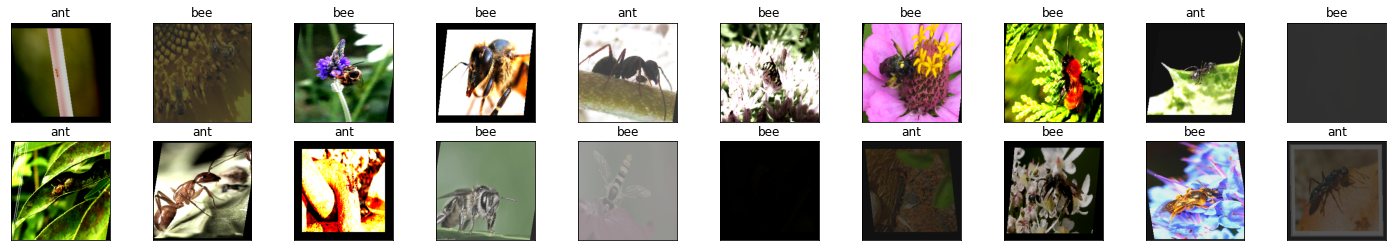

In [ ]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize= (25, 4))
for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks= [], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title(classes[labels[idx].item()])

In [ ]:
#model = models.alexnet(pretrained = True)
model = models.vgg16(pretrained = True) #vgg16 net is trained on 4 gpus for 2-3 weeks
                                        # hence high accuracy

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
for param in model.features.parameters():
  param.requires_grad = False

In [ ]:
n_inputs = model.classifier[6].in_features
last_layer = nn.Linear(n_inputs, len(classes))
model.classifier[6] = last_layer
model.to(device)

print(model.classifier[6].out_features)

2


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [ ]:
epochs = 5
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0

  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)

        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)

    epoch_loss = running_loss/len(training_loader.dataset)
    epoch_acc = running_corrects.float()/len(training_loader.dataset)

    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)

    val_epoch_loss = val_running_loss/len(validation_loader.dataset)
    val_epoch_acc = val_running_corrects.float()/len(validation_loader.dataset)

    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)

    print('epoch :', e+1)
    print('training loss : {:.4f} , acc: {:.4f}'.format(epoch_loss,epoch_acc.item()))
    print('validation loss : {:.4f} , acc: {:.4f}'.format(val_epoch_loss,val_epoch_acc.item()))

epoch : 1
training loss : 0.0311 , acc: 0.6639
validation loss : 0.0144 , acc: 0.8824
epoch : 2
training loss : 0.0160 , acc: 0.8566
validation loss : 0.0140 , acc: 0.9216
epoch : 3
training loss : 0.0130 , acc: 0.8566
validation loss : 0.0153 , acc: 0.9216
epoch : 4
training loss : 0.0143 , acc: 0.8566
validation loss : 0.0163 , acc: 0.9085
epoch : 5
training loss : 0.0133 , acc: 0.8811
validation loss : 0.0182 , acc: 0.9216


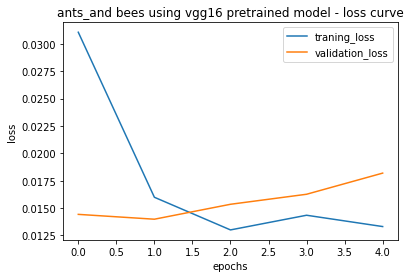

In [ ]:
plt.plot(running_loss_history,label = 'traning_loss')
plt.plot(val_running_loss_history,label = 'validation_loss')
plt.legend()
plt.title('ants_and bees using vgg16 pretrained model - loss curve')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

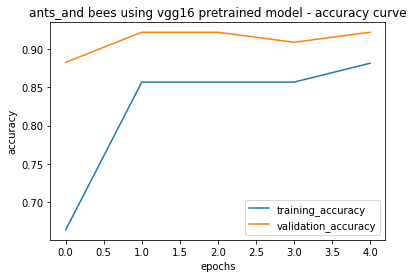

In [ ]:
plt.plot(running_corrects_history, label = 'training_accuracy')
plt.plot(val_running_corrects_history, label = 'validation_accuracy')
plt.legend()
plt.title('ants_and bees using vgg16 pretrained model - accuracy curve')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

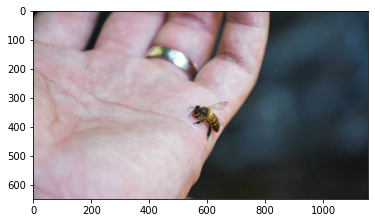

In [ ]:
import requests
from PIL import Image
import PIL
url = 'https://i0.wp.com/images-prod.healthline.com/hlcmsresource/images/AN_images/bee-venom-1296x728-feature.jpg?w=1155&h=1528'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

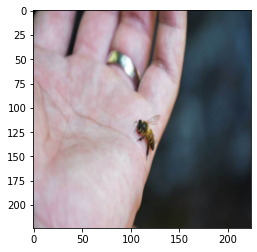

In [ ]:
img = transform(img)
plt.imshow(im_convert(img))

In [ ]:
image = img.to(device).unsqueeze(0)
output = model(image)
_, pred = torch.max(output, 1)
print(classes[pred.item()])

ant


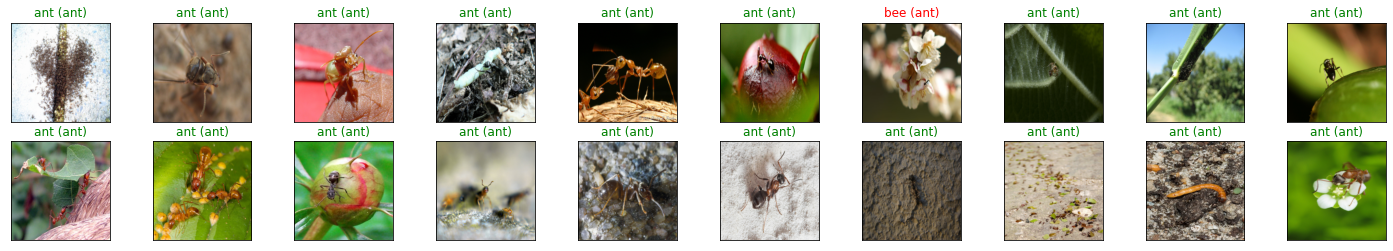

In [ ]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize= (25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks= [], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title('{} ({})'.format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color = ('green' if preds[idx].item() == labels[idx].item() else 'red'))